# 실무예제 4-5
## 다음은 2013년 전국 주요지점별 유동인구 수 현황의 일부이다. 샘플링(Sampling), 히스토그램(Histogram), 클러스터링(clustering)을 활용하여 투플수를 2,000개 이하로 축소시키시오.
### 데이터 파일 : ch4-5(유동인구수).csv
### 원본 투플수 : 23,221개

In [1]:
# ch4-5.py
import pandas as pd
import numpy as np
import random as rd  # 샘플링을 위한 random 패키지 임포트

# 데이터로드 (ch4-5(유동인구수).csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('.jupyter/ch4-5(유동인구수).csv', encoding='CP949', engine='python')

In [2]:
rawData

,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대
0,2010-06-21,12시~13시까지,343099,417482,대전광역시 서구 월평동,2,24,68,50,31,4,37,64,44,26
1,2010-06-21,19시~20시까지,343099,417482,대전광역시 서구 월평동,19,44,28,33,21,14,56,49,43,18
2,2010-06-20,12시~13시까지,343099,417482,대전광역시 서구 월평동,13,33,34,61,55,13,32,29,28,12
3,2010-06-20,19시~20시까지,343099,417482,대전광역시 서구 월평동,23,33,32,547,129,12,39,13,46,4
4,2010-06-21,12시~13시까지,343121,417343,대전광역시 서구 월평동,0,9,27,21,6,5,24,20,10,6
5,2010-06-21,19시~20시까지,343121,417343,대전광역시 서구 월평동,4,22,12,22,12,6,30,27,7,3
6,2010-06-20,12시~13시까지,343121,417343,대전광역시 서구 월평동,3,8,5,8,11,2,8,9,4,3
7,2010-06-20,19시~20시까지,343121,417343,대전광역시 서구 월평동,6,17,19,21,27,5,16,18,11,11
8,2010-06-04,12시~13시까지,311013,523508,경기도 수원시 정자1동,24,26,32,45,60,21,28,98,195,201
9,2010-06-04,19시~20시까지,311013,523508,경기도 수원시 정자1동,13,36,18,18,90,48,36,36,114,126


## 1) 샘플링을 통한 수량 축소

In [3]:
# 1) 샘플링을 통한 수량 축소
# 소스 데이터를 읽은 데이터프레임의 인덱스 값 중 2,000개를 샘플링
# len() : 데이터프레임의 크기를 구하는 함수
sample_idx = rd.sample(range(0, len(rawData)), 2000)

# 인덱스 값 정렬(오름차순)
sample_idx.sort()

# 샘플링 된 인덱스로 구성된 샘플 데이터프레임 생성
rawData_sample = rawData.loc[sample_idx]

# 첫 10개의 행만 출력
rawData_sample.head(10)

,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대
27,2010-06-26,19시~20시까지,348993,427864,대전광역시 대덕구 석봉동,38,58,29,48,33,27,42,34,12,8
32,2010-06-29,12시~13시까지,349741,418313,대전광역시 대덕구 송촌동,3,8,34,14,12,1,6,8,5,13
42,2010-06-12,12시~13시까지,522024,327118,울산광역시 남구 삼산동,0,15,33,51,87,6,9,18,9,51
61,2010-07-15,19시~20시까지,367871,521139,경기도 여주군 여주읍,80,90,40,30,64,48,142,84,34,148
71,2010-07-04,19시~20시까지,367906,521397,경기도 여주군 여주읍,36,18,20,22,40,26,56,36,48,52
76,2010-06-24,12시~13시까지,518930,326688,울산광역시 남구 신정동,42,183,63,72,45,36,246,147,123,105
79,2010-07-04,19시~20시까지,518930,326688,울산광역시 남구 신정동,171,267,48,69,78,231,321,39,123,126
89,2010-06-29,19시~20시까지,521807,329491,울산광역시 중구 반구동,48,39,33,45,54,27,18,12,18,54
90,2010-07-03,12시~13시까지,521807,329491,울산광역시 중구 반구동,78,36,24,30,54,141,30,6,39,36
94,2010-10-09,12시~13시까지,316993,589665,경기도 동두천시 중앙동,96,66,90,78,90,144,84,134,100,72


### random 패키지에 있는 sample() 함수를 이용하여 pandas 데이터프레임의 인덱스 값을 원하는 크기만큼 샘플링하는 예제
### 비복원 방식에 해당하며, 샘플링 된 인덱스값을 오름차순으로 정렬하여 처음 10개만 출력하였다. 

## 2) 히스토그램을 통한 수량 축소

In [4]:
# 2) 히스토그램을 통한 수량 축소
# 소스 데이터프레임에 총계 컬럼 추가 : sampling 빈도를 구하는데 활용
rawData['총계'] = rawData['남자10대']+rawData['남자20대']+rawData['남자30대']\
                +rawData['남자40대']+rawData['남자50대']+rawData['여자10대']+rawData['여자20대']\
                +rawData['여자30대']+rawData['여자40대']+rawData['여자50대']

# rawData_grp : 총계 컬럼값을 100으로 나눈 몫을 기준으로 그룹핑하여 그룹별 그룹값과 빈도수(count)를 구함
# groupby() 함수의 패러미터로 as_index=False를 주지 않았기 때문에 index 값은 rawData['총계']//100 값이 그대로 쓰임
# rawData_hist : 그룹별 기준값과 빈도값을 저장하는 데이터프레임
rawData_grp = rawData.groupby(rawData['총계']//100)['총계'].count()
rawData_hist = pd.DataFrame(data={'기준' : rawData_grp.index.values, '빈도' : rawData_grp.values})

# sum_tot : 빈도 컬럼의 총합
sum_tot = rawData_hist['빈도'].sum()

In [5]:
rawData_grp

총계
0       977
1      3172
2      3892
3      3246
4      2410
5      1921
6      1489
7      1125
8       826
9       688
10      570
11      444
12      380
13      292
14      260
15      212
16      159
17      149
18      116
19      116
20       87
21       77
22       70
23       46
24       54
25       38
26       42
27       29
28       33
29       21
       ... 
48        3
49        4
50        2
51        8
52        5
53        5
54        4
55        5
57        6
58        2
59        3
62        4
63        2
66        4
69        1
73        1
74        1
75        1
76        1
83        1
87        1
90        1
93        2
95        2
108       1
127       1
130       1
132       1
134       1
169       1
Name: 총계, Length: 78, dtype: int64

In [6]:
rawData_hist

,기준,빈도
0,0,977
1,1,3172
2,2,3892
3,3,3246
4,4,2410
5,5,1921
6,6,1489
7,7,1125
8,8,826
9,9,688


In [7]:
sum_tot

23221

### 성별/연령별 유동인구수의 합(총계)에 대한 히스토그램(구간단위 100)을 구하고 각 구간에 속하는 로우의 빈도수에 따라 샘플링하는 수량축소 방식
### 우선, pandas 데이터프레임의 groupby()를 이용하여 소스 데이터가 들어있는 rawData의 ‘총계’ 컬럼을 100으로 나눈 몫(rawData[‘총계’]//100. 연산자 //는 나눈 몫을 구하는 연산자)을 그룹핑하고 그룹핑 기준값(rawData[‘총계’]//100 값 자체)과 그룹별 로우의 빈도(count())를 새로운 데이터프레임 rawData_grp에 저장함. 
#### 이때, as_index=False를 패러미터로 넘기지 않았는데 이는 default값 True를 사용하겠다는 뜻으로 그룹핑 기준값을 인덱스로 사용하겠다는 뜻임.
### 그런 다음, rawData_grp의 인덱스값과 빈도값을 컬럼으로 하는 rawData_hist 데이터프레임 생성 

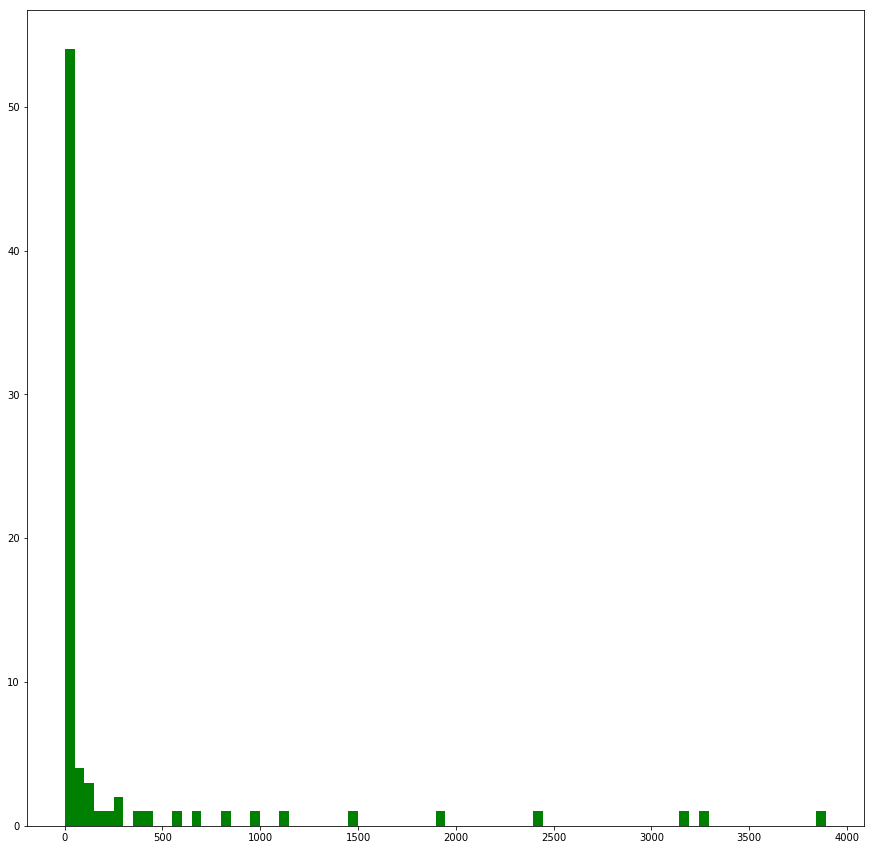

In [9]:
# 데이터프레임 rawData_hist에 대한 히스토그램 시각화
import matplotlib.pyplot as plt

n_bins = len(rawData_hist)
fig, ax = plt.subplots(1, 1, figsize = (15,15))
ax.hist(rawData_hist['빈도'], bins=n_bins, color="green")

plt.show()  # 그래프 보여주기

###  rawData_hist : 히스토그램 정보를 저장하고 있는 데이터프레임

In [10]:
# 최종 sampling된 인덱스 리스트를 저장
sample_idx = []

# rawData_hist를 하나씩 읽어가면서 해당 기준값 범위에 있는 총계값을 가진 rawData 행 인덱스를 대상으로 빈도수에 비례하여 sampling 수행
for j in range(0, len(rawData_hist)) :
    sample_gugan_idx = rd.sample(list(rawData.loc[rawData['총계'].isin(range(rawData_hist.loc[j]['기준']*100,
                                                                (rawData_hist.loc[j]['기준']+1)*100))].index.values),
                                 rawData_hist.loc[j]['빈도'] * 2000 // sum_tot)
    sample_idx += sample_gugan_idx

sample_idx.sort()

### rawData_hist를 대상으로 샘플링을 수행
### 샘플링은 rawData_hist의 행을 하나씩 읽어가면서 해당 기준값 범위에 있는 총계값을 가진 rawData 행 인덱스를 대상으로 빈도수에 비례하여 랜덤으로 로우를 추출하며 수행함 

In [11]:
# 샘플링 된 인덱스로 구성된 샘플 데이터프레임 생성
rawData_sample = rawData.loc[sample_idx]

# 샘플링된 총 로우의 갯수
print("* 샘플링된 총 로우의 개수 : " + str(len(rawData_sample)))

# 첫 10개의 행만 출력
rawData_sample.head(10)

* 샘플링된 총 로우의 개수 : 1970


,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대,총계
10,2010-06-05,12시~13시까지,311013,523508,경기도 수원시 정자1동,14,25,45,36,52,9,32,42,36,34,325
20,2010-06-27,12시~13시까지,344808,416386,대전광역시 서구 탄방동,8,8,8,5,9,12,14,7,10,2,83
25,2010-06-28,19시~20시까지,348993,427864,대전광역시 대덕구 석봉동,11,26,13,14,27,41,16,15,6,35,204
42,2010-06-12,12시~13시까지,522024,327118,울산광역시 남구 삼산동,0,15,33,51,87,6,9,18,9,51,279
44,2010-06-09,12시~13시까지,521867,327114,울산광역시 남구 삼산동,0,24,48,57,42,0,42,33,12,6,264
50,2010-07-03,12시~13시까지,316040,572204,경기도 의정부시 의정부1동,59,38,48,44,41,89,60,41,40,32,492
52,2010-07-01,12시~13시까지,315831,572132,경기도 의정부시 의정부1동,13,15,26,16,17,9,22,30,26,17,191
101,2010-10-07,19시~20시까지,316953,589512,경기도 동두천시 중앙동,56,42,64,56,42,36,34,44,34,38,446
105,2010-06-16,19시~20시까지,520908,327460,울산광역시 남구 삼산동,54,87,66,48,48,36,102,54,75,57,627
109,2010-10-08,19시~20시까지,316654,589071,경기도 동두천시 생연2동,78,48,68,72,54,50,38,48,30,46,532


### 히스토그램 기법으로 샘플링된 로우의 총개수는 1,970개
### 1)번과 같은 순수 랜덤 샘플링에 의한 수량축소 방식과 비교하여 히스토그램에 의한 수량축소 방식은 
#### 장점 : 빈도수에 기반하여 빈번히 나타나는 값의 영역대를 많이 샘플링함으로써 모집단의 특성을 좀 더 정확하게 반영함
#### 단점 : 빈도수가 적은 값 영역대의 로우는 전혀 샘플링이 안될 수도 있어 소수의 특징적인 현황을 분석해야하는 상황에서는 적절하지 않을 수 있음

## 3) 클러스터링을 통한 수량 축소

In [13]:
# 3) 클러스터링을 통한 수량 축소
# K-Means 클러스터링 관련 함수를 가지고 있는 모듈 임포트
from sklearn.cluster import KMeans

n = 10  # 클러스터 개수

# K-Means 클러스터링 알고리듬 수행
kmeans = KMeans(n_clusters=n).fit(rawData.loc[:, '남자10대' : '여자50대'])

# kmeans.labels_ : 소스데이터의 각 행들의 클러스터 레이블을 저장하고 있는 속성 리스트
# labelDF : 행별로 클러스터링 결과 레이블을 저장하는 데이터프레임
labelDF = pd.DataFrame(kmeans.labels_, columns={'cluster_label'})

# labelDF 데이터프레임을 대상으로 cluster_label 별 빈도수 구함
cluster_cnt = labelDF.groupby('cluster_label')['cluster_label'].count()

# 최종 sampling된 인덱스 리스트를 저장
sample_idx = []

# 0부터 n까지의 cluster label을 하나씩 읽어가면서 해당 label 값을 가진 rawData 행 인덱스를 대상으로 빈도수에 비례하여 sampling 수행
for i in range(0, n) :
    sample_gugan_idx = rd.sample(list(labelDF['cluster_label'].isin([i]).index.values), cluster_cnt[i] * 2000 // len(labelDF))
    sample_idx += sample_gugan_idx

sample_idx.sort()  # 오름차순 정렬

# 샘플링 된 인덱스로 구성된 샘플 데이터프레임 생성
rawData_sample = rawData.loc[sample_idx]

# 샘플링된 총 로우의 갯수
print("* 샘플링된 총 로우의 개수 : " + str(len(rawData_sample)))

# 첫 10개의 행만 출력
rawData_sample.head(10)

* 샘플링된 총 로우의 개수 : 1997


,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대,총계
2,2010-06-20,12시~13시까지,343099,417482,대전광역시 서구 월평동,13,33,34,61,55,13,32,29,28,12,310
11,2010-06-05,19시~20시까지,311013,523508,경기도 수원시 정자1동,36,42,89,78,64,32,45,95,78,42,601
28,2010-06-28,12시~13시까지,349044,427745,대전광역시 대덕구 신탄진동,28,6,27,12,10,15,27,38,53,22,238
58,2010-07-03,12시~13시까지,367855,521079,경기도 여주군 여주읍,24,52,10,32,80,6,50,44,50,64,412
82,2010-07-04,12시~13시까지,519133,326794,울산광역시 남구 신정동,36,90,24,18,51,33,45,18,18,78,411
100,2010-10-07,12시~13시까지,316953,589512,경기도 동두천시 중앙동,14,24,44,28,32,10,34,28,40,24,278
105,2010-06-16,19시~20시까지,520908,327460,울산광역시 남구 삼산동,54,87,66,48,48,36,102,54,75,57,627
106,2010-06-19,12시~13시까지,520908,327460,울산광역시 남구 삼산동,63,51,78,39,30,54,72,51,51,63,552
113,2010-10-08,19시~20시까지,316730,589063,경기도 동두천시 생연2동,76,58,82,74,56,66,40,62,50,46,610
120,2010-06-11,12시~13시까지,324709,561181,경기도 남양주시 퇴계원면,12,20,42,26,30,8,26,22,26,20,232


### K-means 클러스터링 기법을 활용하여 전체 로우를 클러스터링하고 각 클러스터에 속한 로우의 빈도수에 따라 샘플링하는 수량축소 방식
### K-means 클러스터링 : sklearn 패키지의 KMeans 모듈에 있는 KMeans() 함수를 활용함
### 샘플링은 random 패키지에 있는 sample() 함수를 활용함
### 클러스터링 기법으로 샘플링된 로우의 총개수는 1,996개 (실행할 때마다 몇 개 차이로 가변적임)